In [2]:
%pip install matplotlib

^C
Note: you may need to restart the kernel to use updated packages.


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pillow-11.3.0-cp312-cp312-win_amd64.whl.metadata (9.2 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------------------------------------- - 7.9/8.1 MB 40.7 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 33.6 MB/s  0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 25.7 MB/s  0:00:00
Using cached pillow-11.3.0-cp312-cp312-win_amd64.whl (7.0 MB)

   ---------------------------------------- 0/7 [pyparsing]
   ---------------------------------------- 0/7 [pyparsing]
   ---------------------------------------- 0/7 [pyparsing]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ------------------------

In [13]:
# 결측치: 데이터 누락 (None, NaN)
import pandas as pd
import numpy as np
# np.array( [1,2,3] ) + np.array( [1,2,3] ) #numpy는 각 요소끼리 더하거나 곱함
# [1,2,3]+[1,2,3]
df = pd.DataFrame({
    'A':[1,2,np.nan,4],
    'B':[5,np.nan,np.nan,8],
    'C':[9,10,11,12]
})
print('결측치 확인(isna)')
print(df.isna())
print('------------')
print(df.isna().sum()) #각 컬럼에 결측치(True)의 개수
print('------------')
print(df.info())

결측치 확인(isna)
       A      B      C
0  False  False  False
1  False   True  False
2   True   True  False
3  False  False  False
------------
A    1
B    2
C    0
dtype: int64
------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       3 non-null      float64
 1   B       2 non-null      float64
 2   C       4 non-null      int64  
dtypes: float64(2), int64(1)
memory usage: 228.0 bytes
None


In [ ]:
# 결측치 제거
# dropna() 결측치가 포함된 행 또는 열을 제거 (기본값: axis=0 -> 결측치가 포함된 행을 제거, how='any')
# how='all' -> 모든 값이 결측치일 때 삭제!
# thresh -> 지정한 개수 이상의 비결측치값이 있는 행, 열을 유지
print(df)
print('-----------------')
print(df.dropna())
print('-----------------')
print(df.dropna(axis=1))
print('-----------------')
print(df.dropna(how='all'))
print('-----------------')
df.dropna(thresh=2) #정상 데이터가 2개 이상인 행만 유지

     A    B   C
0  1.0  5.0   9
1  2.0  NaN  10
2  NaN  NaN  11
3  4.0  8.0  12
-----------------
     A    B   C
0  1.0  5.0   9
3  4.0  8.0  12
-----------------
    C
0   9
1  10
2  11
3  12
-----------------
     A    B   C
0  1.0  5.0   9
1  2.0  NaN  10
2  NaN  NaN  11
3  4.0  8.0  12
-----------------


,A,B,C
0,1.0,5.0,9
1,2.0,NaN,10
3,4.0,8.0,12


In [ ]:
# 결측치 대체
# fillna(): 특정 값으로 채우기
df.fillna(0)
df.mean() #각 컬럼의 평균값

df.fillna(df.mean()) #df.max(), df.min()
df.fillna(df.mode()) #수치 데이터가 아닌 object형은 df.mode(): 최빈값
df.bfill() #뒤쪽 값으로 결측치 채우기 (backward fill)
df.ffill() #앞쪽 값으로 결측치 채우기 (forward fill)

,A,B,C
0,1.0,5.0,9
1,2.0,8.0,10
2,4.0,8.0,11
3,4.0,8.0,12


In [50]:
# 보간법 interpolation: 결측치 주변값들을 기반으로한 선형 값으로 채움
# x축이 시계열 데이터일 떄
# 머신러닝 기반: knn, randomforest ...
df_2 = pd.DataFrame({
    'A': [1,2,np.nan,4,np.nan,7]
})
print(df_2)
print('---------------------')
df_2['A'] = df_2['A'].interpolate()
print(df_2)
print('---------------------')
df_2['A'] = df_2['A'].fillna(df['A'].mean)
print(df_2)

     A
0  1.0
1  2.0
2  NaN
3  4.0
4  NaN
5  7.0
---------------------
     A
0  1.0
1  2.0
2  3.0
3  4.0
4  5.5
5  7.0
---------------------
     A
0  1.0
1  2.0
2  3.0
3  4.0
4  5.5
5  7.0


In [52]:
from matplotlib import font_manager, rc
font_path = "./data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

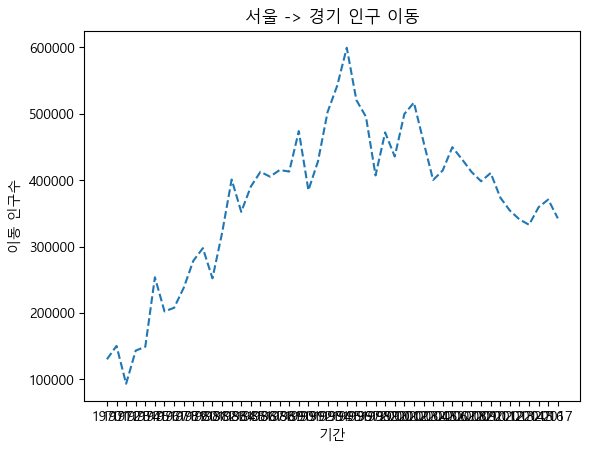

In [53]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')

# 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.ffill()

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul = df_seoul.rename({'전입지별':'전입지'}, axis=1)
df_seoul = df_seoul.set_index('전입지')

# 서울에서 경기도로 이동한 인구 데이터 값만 선택 
sr_one = df_seoul.loc['경기도']

# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, linestyle="--")

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()  # 변경사항 저장하고 그래프 출력